<a href="https://colab.research.google.com/github/yamasakitetuya/dive_into_dl/blob/main/linear_regression_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np



documentation for boston housing price data base:

all columns' data types are float64

* CRIM
* ZN
* INDUS
* CHAS
* NOX
* RM
* AGE
* DIS
* RAD
* TAX
* PTRATIO
* B
* LSTAT
* MEDV (TAG to predict)



In [59]:
csv_dir = "/content/craft_housing/housing.csv"

headers = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
bostons = pd.read_csv(csv_dir, header=None, names=headers, delimiter="\s+")
bostons.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Prepare the data:
Separate features(X) and target(y)



In [60]:
X = bostons.drop('MEDV', axis = 1)
y = bostons['MEDV']

Define the model:

In [61]:
class LinearRegressionNN(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(LinearRegressionNN, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.linear2 = nn.Linear(hidden_size, 1)

  def forward(self, x):
    out = self.linear1(x)
    out = self.linear2(out)
    return out

Train the model:

Fold 1/5


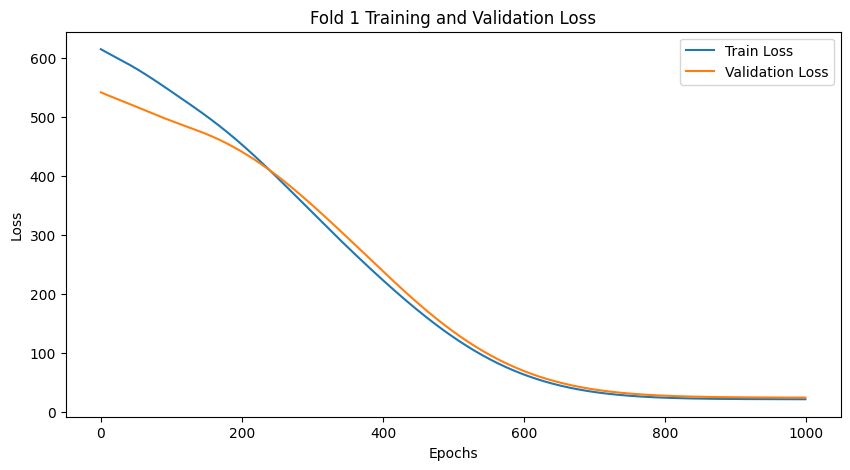

Fold 2/5


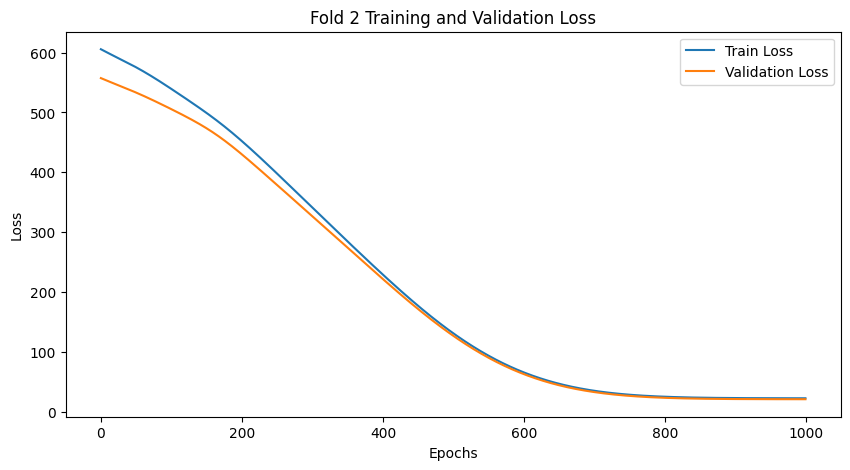

Fold 3/5


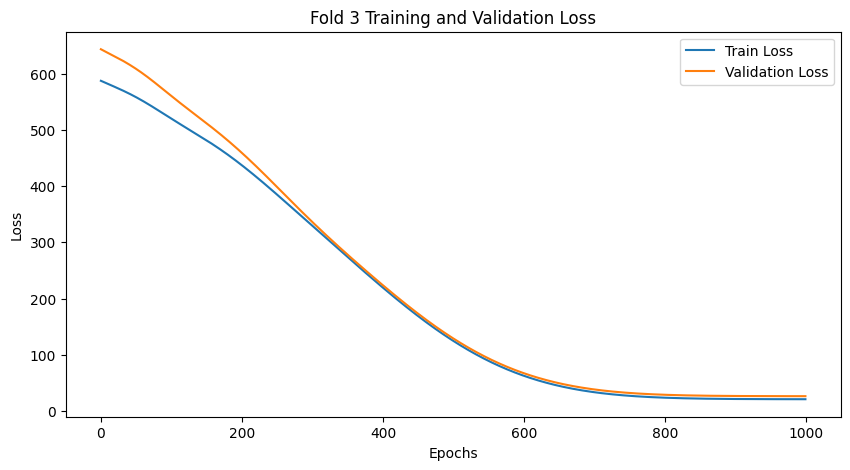

Fold 4/5


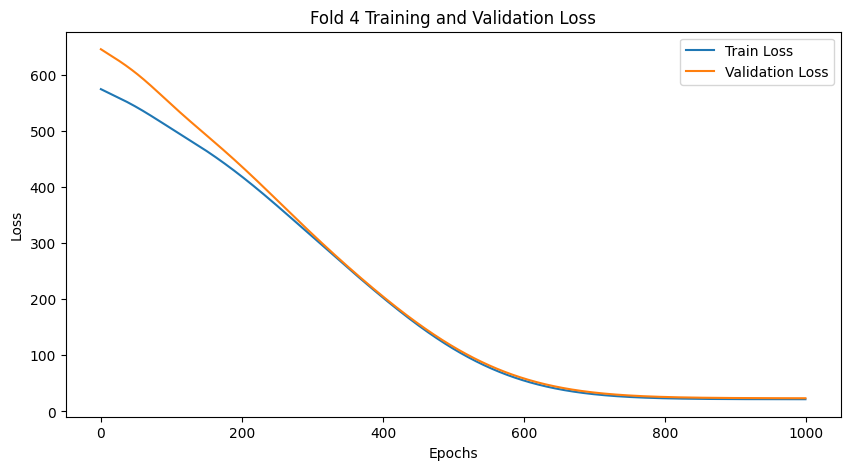

Fold 5/5


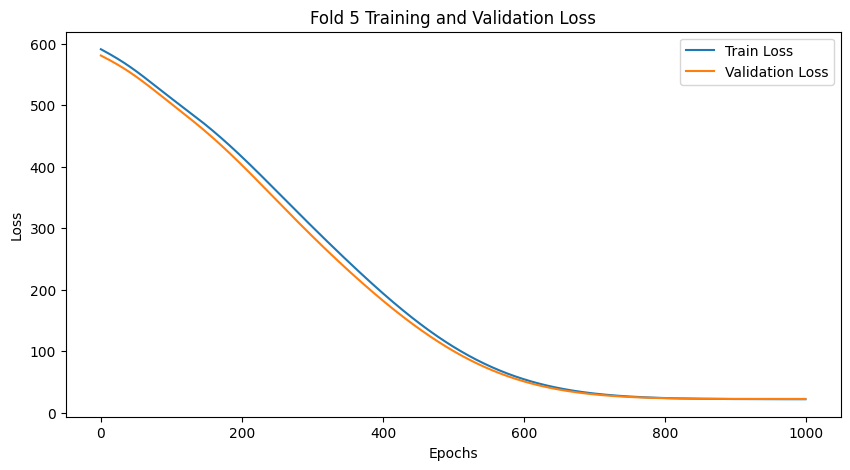

Average Test Loss: 206.6496


In [62]:
# Configuration for cross validation
n_splits = 5

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

test_losses = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
  print(f"Fold {fold + 1}/{n_splits}")

  # allocate train_set and val_set
  X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
  y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

  # scale the data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_val = scaler.transform(X_val)

  # to Pytorch tensors
  X_train = torch.tensor(X_train, dtype=torch.float32)
  X_val = torch.tensor(X_val, dtype=torch.float32)
  y_train = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
  y_val = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)

  # configuraion for model
  input_size = X_train.shape[1]
  hidden_size = 28
  model = LinearRegressionNN(input_size, hidden_size)
  criterion = nn.MSELoss()
  optimizer = optim.Adam(model.parameters(), lr=0.001)

  # for plot
  train_losses = []
  val_losses = []

  # train loop
  epochs = 1000
  for epoch in range(epochs):
    # forward pass
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # record train loss
    train_losses.append(loss.item())

    # validation
    with torch.no_grad():
      y_val_pred = model(X_val)
      val_loss = criterion(y_val_pred, y_val)
      test_losses.append(val_loss.item())

      # record val loss
      val_losses.append(val_loss.item())

  plt.figure(figsize=(10, 5))
  plt.plot(train_losses, label='Train Loss')
  plt.plot(val_losses, label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.title(f'Fold {fold + 1} Training and Validation Loss')
  plt.show()

  # clear loss lists
  train_losses = []
  val_losses = []

average_test_loss = np.mean(test_losses)
print(f"Average Test Loss: {average_test_loss:.4f}")

